In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [6]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/B0ToDstar/Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfmcrecreddppi' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfmcrecreddppi;1
len(full_df): 0


In [7]:
print(full_df.columns)

Index(['fIndexHfRed3Prongs_0', 'fIndexHfRedTrackBases_1', 'fFlagMcMatchRec',
       'fFlagWrongCollision', 'fDebugMcRec', 'fPtMother'],
      dtype='object')


Plotting fIndexHfRed3Prongs_0
Plotting fIndexHfRedTrackBases_1
Plotting fFlagMcMatchRec
Plotting fFlagWrongCollision
Plotting fDebugMcRec
Plotting fPtMother


/tmp/ipykernel_487901/3002618493.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


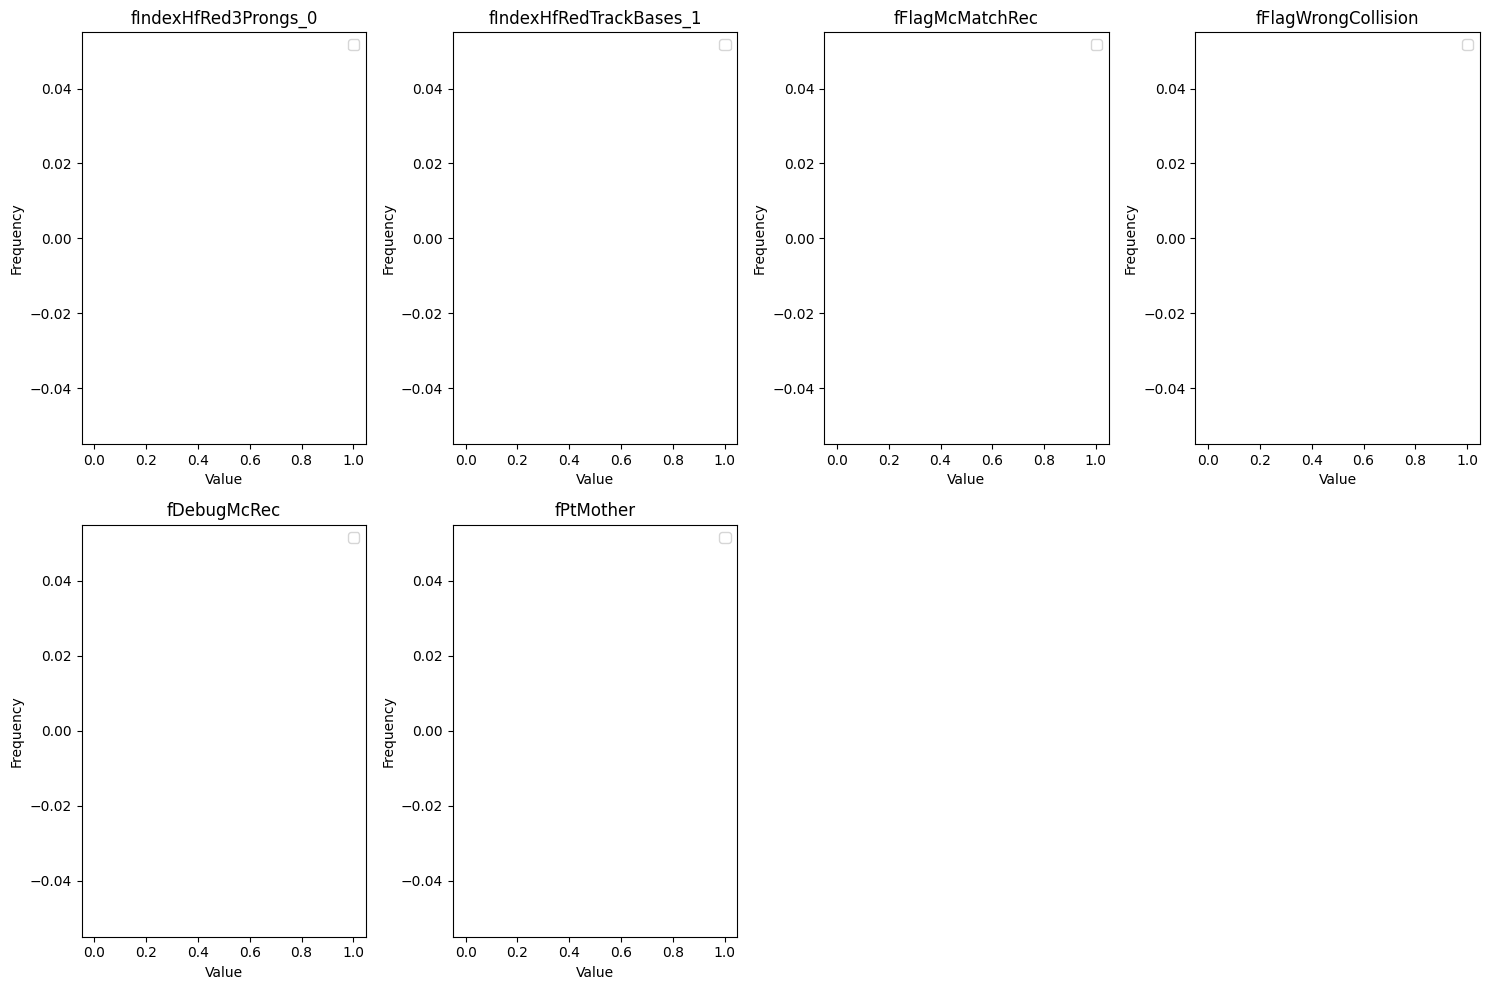

In [8]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()